# DSCI 100 Final Project

**Mining for Insights**

# Introduction
Background: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

Question(s): clearly state the question you tried to answer with your project. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear.

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 

In [31]:
# please run these libraries in order for the code to execute!

set.seed(2025)

install.packages("extrafont")
library(extrafont)
font_import()

install.packages("showtext")
library(showtext)

library(tidyverse)
library(tidymodels)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuMathTeXGyre

/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuSans-Bold

/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuSans-BoldOblique

/usr/share/fonts/truetype/dejavu/DejaVuSans-ExtraLight.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuSans-ExtraLight

/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuSans-Oblique

/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuSans

/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf
 => /opt/conda/lib/R/library/extrafontdb/metrics/DejaVuSansCondensed-Bold

/usr/share/

# Methodology

In [23]:
players <- read_csv("data/players.csv")
dim(players)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


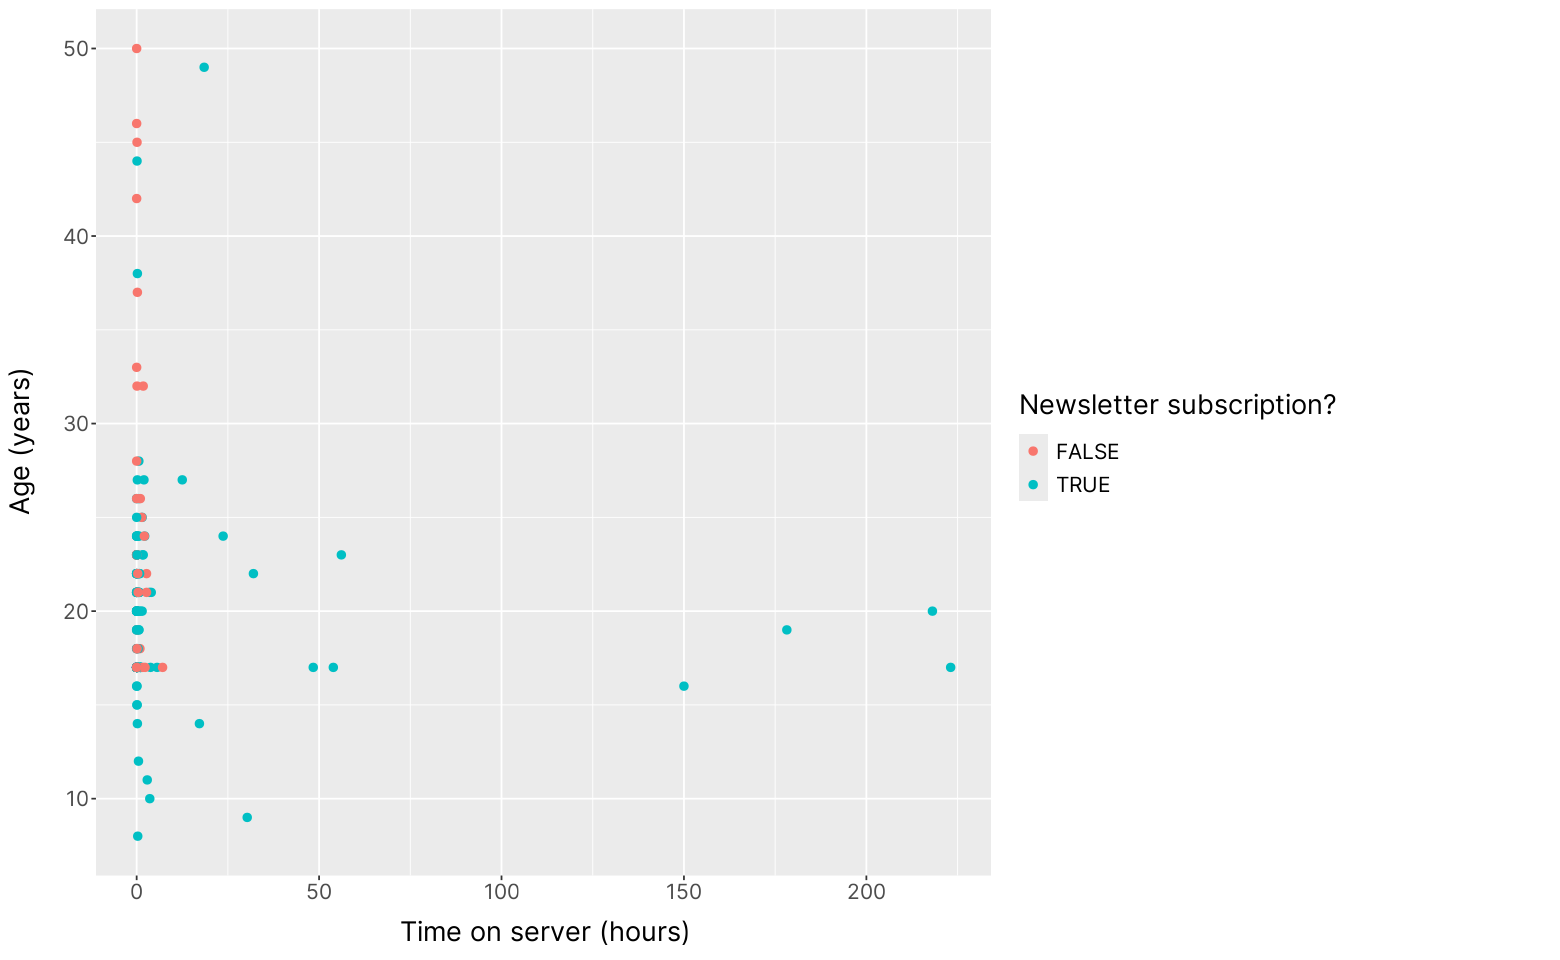

In [40]:
options(repr.plot.height = 8, repr.plot.width = 13)
font_add_google(name = "Inter", family = "inter")
showtext_auto()

test_plot <- players |>
    ggplot(aes(x = played_hours, y = Age, colour = subscribe)) +
        geom_point(size = 2) +
        labs(x = "Time on server (hours)", y = "Age (years)", colour = "Newsletter subscription?") +
        theme(text = element_text(size = 20)) + 
        theme(text = element_text(family = "inter")) 
test_plot

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


`summarise()` has grouped output by 'experience', 'gender'. You can override
using the `.groups` argument.


experience,gender,subscribe,players
<fct>,<fct>,<lgl>,<int>
Amateur,Female,FALSE,3
Amateur,Female,TRUE,11
Amateur,Male,FALSE,10
Amateur,Male,TRUE,30
Amateur,Non-binary,TRUE,1
Amateur,Prefer not to say,FALSE,3


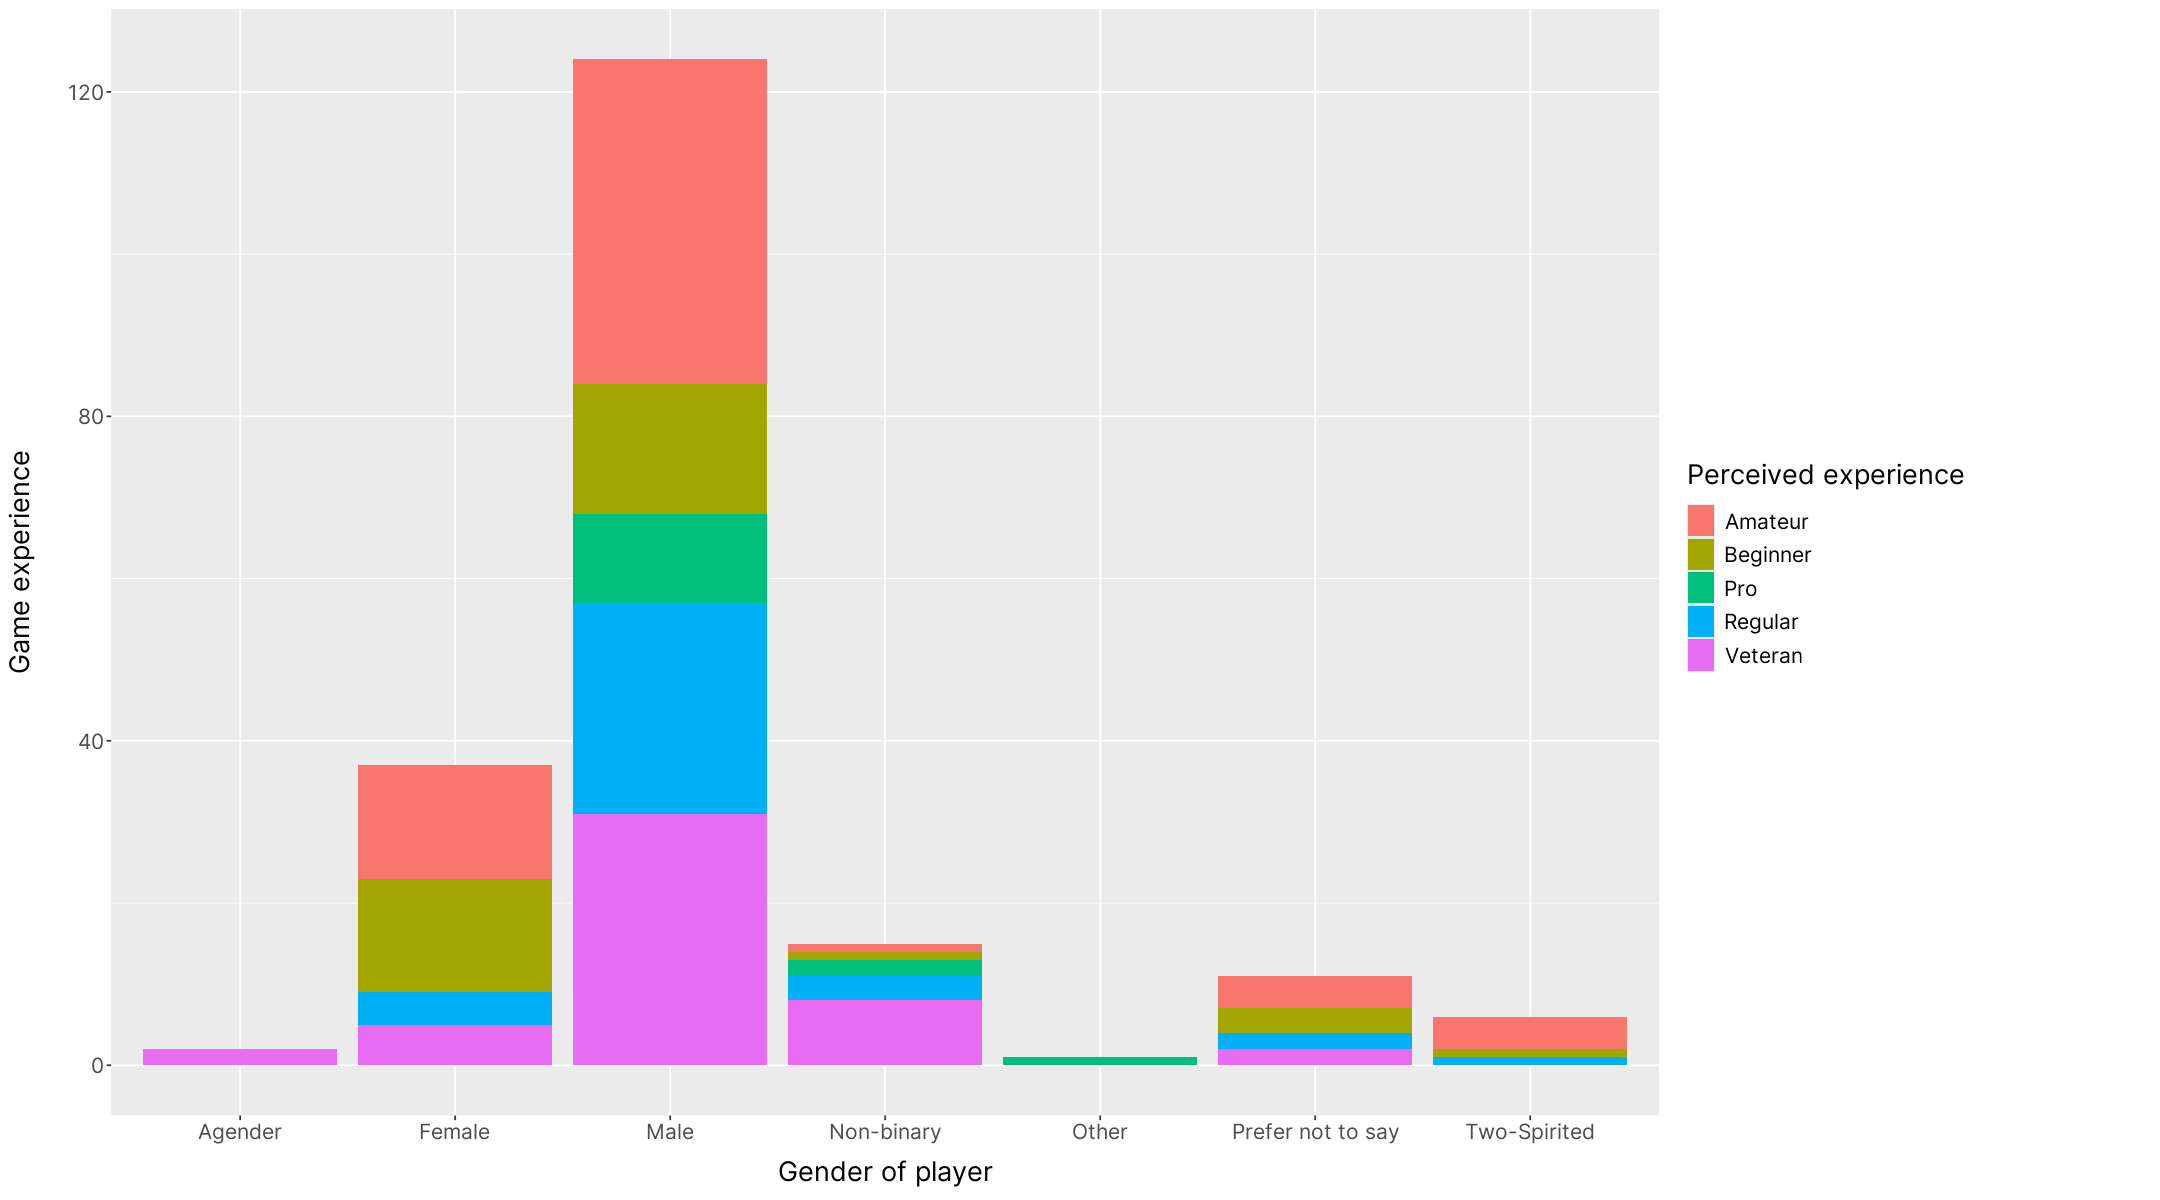

In [57]:
players_tidy <- players |>
    mutate(gender = as.factor(gender)) |>
    mutate(experience = as.factor(experience))
head(players_tidy)

players_final <- players_tidy |>
    group_by(experience, gender, subscribe) |>
    summarize(players = n())
head(players_final)

options(repr.plot.width = 18, repr.plot.height = 10)
demographic_plot <- players_final |>
    ggplot(aes(x = gender, y = players, fill = experience)) +
        geom_bar(stat = "identity") +
        labs(x = "Gender of player", y = "Game experience", fill = "Perceived experience") +
        theme(text = element_text(size = 20, family = "inter"))
demographic_plot

In [24]:
sessions <- read_csv("data/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [106]:
sessions_tidy <- sessions |>
    mutate(start_date = substr(start_time, 1, 10)) |>
    mutate(end_date = substr(end_time, 1, 10)) |>
    mutate(start_play = substr(start_time, 12, 16)) |>
        
    mutate(end_play = substr(end_time, 12, 16)) |>
    select(-original_start_time, -original_end_time) # only selecting the columns we need
head(sessions_tidy)

sessions_tidiest <- sessions_tidy |>
    mutate(start_play = sub("(.{5})(.*)$", "\\1:00", sessions_tidy$start_play)) |>
    mutate(end_play = sub("(.{5})(.*)$", "\\1:00", sessions_tidy$end_play)) |>
    select(-start_time, -end_time)
                    
sessions_time <- sessions_tidiest |> 
    mutate(start_date =
           as.Date(start_date, format = "%d/%m/%Y") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(start_play = 
           hms(start_play) # converting from a character datatype to a date & time datatype
        ) |>
    mutate(end_date =
           as.Date(end_date, format = "%d/%m/%Y") # converting from a character datatype to a date & time datatype
        ) |>
    mutate(end_play = 
           hms(end_play)
        ) 
head(sessions_time)

sessions_time_test <- sessions_time |>
    filter(start_date != end_date) 
sessions_time_test

hashedEmail,start_time,end_time,start_date,end_date,start_play,end_play
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,30/06/2024,30/06/2024,18:12,18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,17/06/2024,17/06/2024,23:33,23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,25/07/2024,25/07/2024,17:34,17:57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,25/07/2024,25/07/2024,03:22,03:58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,25/05/2024,25/05/2024,16:01,16:12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,23/06/2024,23/06/2024,15:08,17:10


hashedEmail,start_date,end_date,start_play,end_play
<chr>,<date>,<date>,<Period>,<Period>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,2024-06-30,18H 12M 0S,18H 24M 0S
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,2024-06-17,23H 33M 0S,23H 46M 0S
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,2024-07-25,17H 34M 0S,17H 57M 0S
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25,2024-07-25,3H 22M 0S,3H 58M 0S
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25,2024-05-25,16H 1M 0S,16H 12M 0S
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23,2024-06-23,15H 8M 0S,17H 10M 0S


hashedEmail,start_date,end_date,start_play,end_play
<chr>,<date>,<date>,<Period>,<Period>
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-05-12,2024-05-13,23H 23M 0S,14M 0S
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-29,2024-06-30,21H 26M 0S,0S
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-27,2024-07-28,23H 30M 0S,23M 0S
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-06-20,2024-06-21,22H 38M 0S,31M 0S
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-20,2024-07-21,23H 22M 0S,1H 50M 0S
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,2024-07-01,2024-07-02,21H 53M 0S,2H 5M 0S
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-06-19,2024-06-20,22H 44M 0S,19M 0S
b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58,2024-08-25,2024-08-26,21H 43M 0S,42M 0S
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-05-20,2024-05-21,23H 2M 0S,8M 0S


In [95]:
server_data <- players_tidy |>
    inner_join(sessions_time) 
server_data

#server_capacity <- server_data |>
    #ggplot(aes(x = start_time, y = )

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_date,end_date,start_play,end_play,session_length
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<date>,<date>,<Period>,<Period>,<Period>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08,2024-08-08,21M 0S,1H 35M 0S,1H 14M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-09,2024-09-09,22H 30M 0S,22H 37M 0S,7M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08,2024-08-08,2H 41M 0S,3H 25M 0S,1H -16M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-10,2024-09-10,15H 7M 0S,15H 29M 0S,22M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-05-05,2024-05-05,22H 21M 0S,23H 17M 0S,1H -4M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-04-06,2024-04-06,22H 24M 0S,23H 33M 0S,1H 9M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-04-20,2024-04-20,20H 46M 0S,21H 48M 0S,1H 2M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-06-15,2024-06-15,16H 37M 0S,18H 37M 0S,2H 0M 0S
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-05-05,2024-05-06,23H 40M 0S,55M 0S,-23H 15M 0S


# Discussion

Why is this method appropriate?

Which assumptions are required, if any, to apply the method selected?

What are the potential limitations or weaknesses of the method selected?

How did you compare and select the model?

Note: you should also think about the following:

How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
creates a visualization of the analysis 

note: all figures should have a figure number and a legend

# References